<a href="https://colab.research.google.com/github/F-Fawzi/Drug-Discovery-Machine-learning-and-data-analysis/blob/main/Part4_ML_Acetylcholinesterase_Regeression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**
This part concern building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

## **Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **Load the data set from part 3**

In [ ]:
df=pd.read_csv('PartIII_acetylcholinesterase_bioactivity_data_pIC50_pubchem_fp.csv')

In [ ]:
df=df.dropna()

### **Input featues**

In [ ]:
X = df.drop('pIC50', axis=1)

### **Output feature**

In [ ]:
Y = df.pIC50

### **Data dimension**

In [ ]:
X.shape

NameError: ignored

In [ ]:
Y.shape

### **Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(5298, 143)

### **Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((4238, 143), (4238,))

In [ ]:
X_test.shape, Y_test.shape

((1060, 143), (1060,))

### **Building a Regression Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5296496189482733

In [ ]:
Y_pred = model.predict(X_test)

### **Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

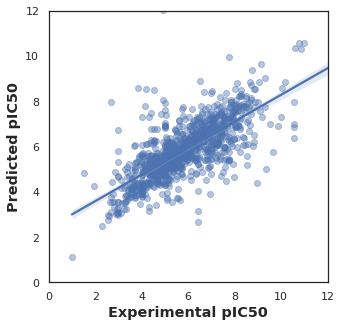

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show